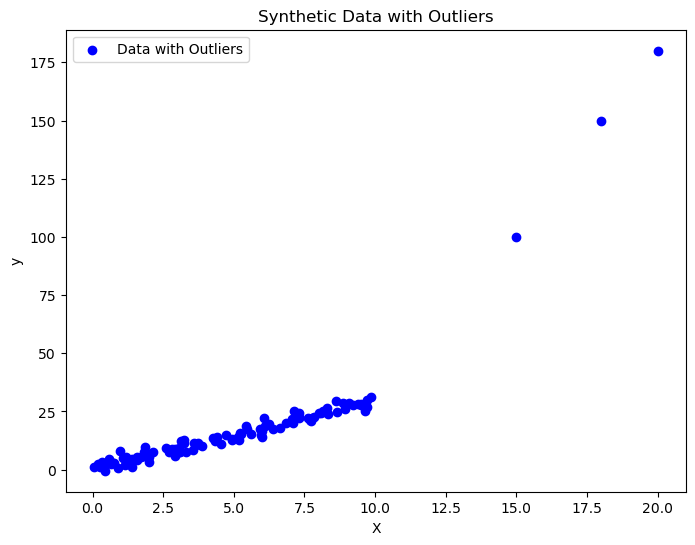

Model Coefficients:
Intercept: -0.0059
Coefficient: 3.0078

Evaluation Metrics:
Mean Squared Error (MSE): 261.1471
Mean Absolute Error (MAE): 4.0304
R-squared (R2 Score): 0.5490


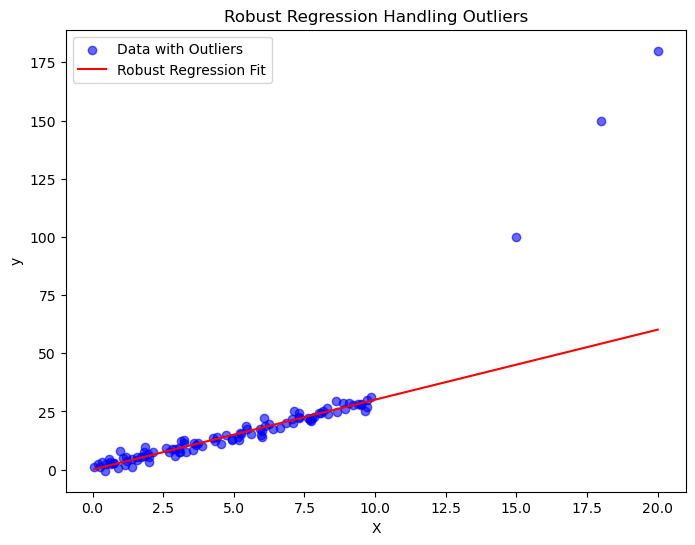

In [2]:
# Robust Regression with Huber Loss Function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import HuberRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


np.random.seed(42)
X = np.random.rand(100, 1) * 10  
y = 3 * X.squeeze() + np.random.randn(100) * 2  


X_outliers = np.append(X, [[15], [18], [20]])
y_outliers = np.append(y, [100, 150, 180])


plt.figure(figsize=(8, 6))
plt.scatter(X_outliers, y_outliers, color="blue", label="Data with Outliers")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Synthetic Data with Outliers")
plt.legend()
plt.show()


huber = HuberRegressor()
huber.fit(X_outliers.reshape(-1, 1), y_outliers)


y_pred = huber.predict(X_outliers.reshape(-1, 1))


print("Model Coefficients:")
print(f"Intercept: {huber.intercept_:.4f}")
print(f"Coefficient: {huber.coef_[0]:.4f}")


mse = mean_squared_error(y_outliers, y_pred)
mae = mean_absolute_error(y_outliers, y_pred)
r2 = r2_score(y_outliers, y_pred)

print("\nEvaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R2 Score): {r2:.4f}")

#Ploting of the results
plt.figure(figsize=(8, 6))
plt.scatter(X_outliers, y_outliers, color="blue", alpha=0.6, label="Data with Outliers")
plt.plot(np.sort(X_outliers), np.sort(y_pred), color="red", label="Robust Regression Fit")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Robust Regression Handling Outliers")
plt.legend()
plt.show()
